In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt



In [3]:
# 1. Load built-in IMDB dataset
max_features = 5000   # top 5000 words
max_len = 200         # maximum review length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


In [16]:
# # Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3
# Retrieve the word index file mapping words to indices
word_index = tf.keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])
print(decoded_sequence)

[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [OOV] is an amazing actor and now the same being director [OOV] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [OOV] and would recommend it to everyone to watch and the fly [OOV] was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [OOV] to the two little [OOV] that played the [OOV] of norman and paul they were just brilliant children are often left out of the [OOV] list i think because the stars that play them all grown up are such a big [OOV] for the whole film but these children are amazing and should be [OOV] for what they

In [17]:
y_train[0]

1

In [15]:
len(x_train[100])

158

In [18]:
# 2. Pad sequences to make them equal length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [19]:
x_train.shape

(25000, 200)

In [20]:
# 3. Build simple LSTM model
model = Sequential([
    Embedding(max_features, 128),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2, ),
    Dense(1, activation='sigmoid')
])

In [21]:
model.build(input_shape=(None, max_len))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,473 (2.63 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# 4. Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
# 5. Train the model
print("Training model...")
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=3,
                    validation_split=0.2,
                    verbose=1)

Training model...
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 94ms/step - accuracy: 0.6799 - loss: 0.5737 - val_accuracy: 0.8196 - val_loss: 0.4047
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.8557 - loss: 0.3516 - val_accuracy: 0.6706 - val_loss: 0.5981
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.7890 - loss: 0.4418 - val_accuracy: 0.8250 - val_loss: 0.3970


In [24]:
# 6. Evaluate on test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 82.68%


In [25]:
from sklearn.metrics import classification_report
# Step 7: Evaluate Model on Test Data
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.6).astype(int)
print("Classification Report:\n", classification_report(y_test, y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83     12500
           1       0.84      0.82      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



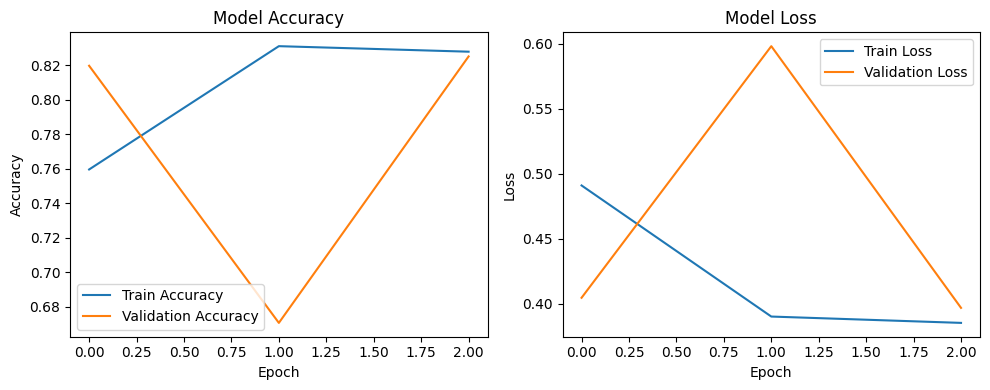

In [27]:
# 7. Plot accuracy and loss
plt.figure(figsize=(10,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()